# Data Science Hausarbeit

_INF21D - Grundlagen Data Science WS 23/24 - Gruppe 9_  
_Philipp Eichwald, Joshua Luipold, Luis Neumeier_

⚠️ **Vergewissern Sie sich, dass das Notebook mit dem _venv_ Kernel ausgeführt wird** ⚠️

## Setup

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
kundendaten = pd.read_csv("data/kundendaten.csv", sep=";", encoding="latin1")
kundendaten.head()

,Datensatz_ID,Kunde_Nr,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter
0,9,23200.0,Thomas Huber,6,Student*In,männlich,evangelisch,25
1,9,23201.0,Michaela Schmidt,1,Student*Innen,w,evangelisch,26
2,9,23202.0,Lena Ebert,6,Studentin,w,katholisch,23
3,9,23203.0,Kurt Funkel,6,Studierend,m,katholisch,21
4,9,23204.0,Eva Jäger,7,Student*Innen,w,konfessionslos,22


In [3]:
produktdaten = pd.read_csv("data/produktdaten.csv", sep=";", encoding="latin1")
produktdaten.head()

,Buch_ID,Titel,Autor,Preis,Buch_typ
0,205.0,Das Sprach-Lese-Buch 1,Klaus Diedrichs,"25,00",hc
1,206.0,Das Sprach-Lese-Buch 2,Klaus Diedrichs,"24,00",hc
2,207.0,Das Sprach-Lese-Buch 3,Klaus Diedrichs,"22,00",hc
3,208.0,Das Sprach-Lese-Buch 4,Klaus Diedrichs,"24,00",hc
4,132.0,1000 spannende Fussballfakten,Daniel Kicker,"22,00",hc


In [4]:
transaktionsdaten = pd.read_csv("data/transaktionsdaten.csv", sep=";", encoding="latin1")
transaktionsdaten.head()

,Datensatz_ID,Kauf_Datum,Kunden_Nr,Buch_ID,Kauf_Typ
0,9,12.01.2023,23393,179,spontan
1,9,25.01.2023,23208,170,spontan
2,9,05.01.2023,23386,195,spontan
3,9,26.01.2023,23370,223,spontan
4,9,12.01.2023,23391,137,spontan


## Vorverarbeitung der Rohdaten
Die Rohdaten sind nicht gut normalisiert, sodass Vorverarbeitung notwendig ist.
Beispiele:
- kundendaten.Beruf: "Student" und "Studierend"
- kundendaten.Geschlecht: "männlich" und "m"
- kundendaten.Kunden_Nr: NaN-Werte
- produktdaten.Titel
- produktdaten.Preis
- transaktionsdaten.Kauf_Datum

In [5]:
kundendaten_cleaned = kundendaten.copy()
kundendaten_cleaned = kundendaten_cleaned.dropna()
kundendaten_cleaned = kundendaten_cleaned.drop(columns=["Datensatz_ID"])
kundendaten_cleaned["Kunde_Nr"] = kundendaten_cleaned["Kunde_Nr"].astype(int)
kundendaten_cleaned["Beruf"] = kundendaten_cleaned["Beruf"].replace("Student*In","Student").replace("Student*Innen","Student").replace("Studentin","Student").replace("Studierend","Student").replace("Studi","Student").replace("Doktorandin","Doktorand")
kundendaten_cleaned["Beruf"] = kundendaten_cleaned["Beruf"].replace("Oma","Rentner").replace("Opa","Rentner").replace("Frührentnerin","Rentner").replace("Frührentner","Rentner").replace("Pensionärin","Rentner").replace("Pensionär","Rentner").replace("Rentnerin","Rentner").replace("Vorruheständler","Rentner").replace("Ruheständler","Rentner")
kundendaten_cleaned["Beruf"] = kundendaten_cleaned["Beruf"].replace("Hausfrau","Hausmann").replace("Chemikerin","Chemiker").replace("Elektronikerin","Elektroniker").replace("IT-Fachfrau","IT-Fachmann").replace("Bankkauffrau","Bankkaufmann").replace("Bäckerin","Bäcker").replace("Rechtsanwältin","Rechtsanwalt").replace("Biologin","Biologe").replace("Betriebswirtin","Betriebswirt").replace("Mama","Papa").replace("Altenpflegerin","Altenpfleger")


kundendaten_cleaned = kundendaten_cleaned[kundendaten_cleaned["Alter"]>0]
kundendaten_cleaned["Geschlecht"] = kundendaten_cleaned["Geschlecht"].replace("männlich", "m").replace("weiblich", "w").replace("0","m").replace("1","w").replace("male","m").replace("female","w")
kundendaten_cleaned.head()

,Kunde_Nr,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter
0,23200,Thomas Huber,6,Student,m,evangelisch,25
1,23201,Michaela Schmidt,1,Student,w,evangelisch,26
2,23202,Lena Ebert,6,Student,w,katholisch,23
3,23203,Kurt Funkel,6,Student,m,katholisch,21
4,23204,Eva Jäger,7,Student,w,konfessionslos,22


In [6]:
produktdaten_cleaned = produktdaten.copy()
produktdaten_cleaned = produktdaten_cleaned.dropna()
produktdaten_cleaned["Buch_ID"] = produktdaten_cleaned["Buch_ID"].astype(int)

for i in produktdaten_cleaned.index:
    titel = produktdaten_cleaned.loc[i,"Titel"]
    if "\n" in titel:
        produktdaten_cleaned.loc[i,"Titel"] = titel.split("\n")[0]
    if titel[0] == " ":
        produktdaten_cleaned.loc[i,"Titel"] = titel[1:]

produktdaten_cleaned["Preis"] = produktdaten_cleaned["Preis"].str.replace(".","").str.replace(",",".").astype(float)
produktdaten_cleaned = produktdaten_cleaned[(produktdaten_cleaned["Preis"] > 0) & (produktdaten_cleaned["Preis"] < 1000)]
produktdaten_cleaned["Buch_typ"] = produktdaten_cleaned["Buch_typ"].str.replace("hc","hard cover").replace("pb","paperback").replace("Taschenbuch","paperback")
produktdaten_cleaned.head()

,Buch_ID,Titel,Autor,Preis,Buch_typ
0,205,Das Sprach-Lese-Buch 1,Klaus Diedrichs,25.0,hard cover
1,206,Das Sprach-Lese-Buch 2,Klaus Diedrichs,24.0,hard cover
2,207,Das Sprach-Lese-Buch 3,Klaus Diedrichs,22.0,hard cover
3,208,Das Sprach-Lese-Buch 4,Klaus Diedrichs,24.0,hard cover
4,132,1000 spannende Fussballfakten,Daniel Kicker,22.0,hard cover


In [7]:
transaktionsdaten_cleaned = transaktionsdaten.copy()
transaktionsdaten_cleaned = transaktionsdaten_cleaned.dropna()
transaktionsdaten_cleaned = transaktionsdaten_cleaned.drop(columns=["Datensatz_ID"])
transaktionsdaten_cleaned["Kauf_Datum"] = transaktionsdaten_cleaned["Kauf_Datum"].str.replace(" 00:00:00", "").str.replace("1023","2023")
transaktionsdaten_cleaned["Kauf_Datum"] = pd.to_datetime(transaktionsdaten_cleaned["Kauf_Datum"], format="%d.%m.%Y", dayfirst=True)
transaktionsdaten_cleaned.head()

,Kauf_Datum,Kunden_Nr,Buch_ID,Kauf_Typ
0,2023-01-12,23393,179,spontan
1,2023-01-25,23208,170,spontan
2,2023-01-05,23386,195,spontan
3,2023-01-26,23370,223,spontan
4,2023-01-12,23391,137,spontan


## Zusammenführung der Daten
Obwohl eine normalisierte Speicherung der Daten aufgrund von Speicherplatz sinnvoll ist, können die Daten in einer zusammengeführten Form besser analysiert werden.  

Daher werden die Daten im folgenden Schritt so zusammengeführt, dass zu jeder Transaktion sowohl die Buch-Daten als auch dei Kunden-Daten einkludiert sind.

In [8]:
merged_df = transaktionsdaten_cleaned.copy()
merged_df

,Kauf_Datum,Kunden_Nr,Buch_ID,Kauf_Typ
0,2023-01-12,23393,179,spontan
1,2023-01-25,23208,170,spontan
2,2023-01-05,23386,195,spontan
3,2023-01-26,23370,223,spontan
4,2023-01-12,23391,137,spontan
...,...,...,...,...
3095,2023-12-06,23482,133,vorbestellt
3096,2023-12-13,23564,257,spontan
3097,2023-12-15,23203,145,spontan
3098,2023-12-07,23531,274,spontan


In [9]:
merged_df = transaktionsdaten_cleaned.copy()
merged_df = merged_df.merge(kundendaten_cleaned, left_on="Kunden_Nr", right_on="Kunde_Nr")
merged_df = merged_df.merge(produktdaten_cleaned, on="Buch_ID")
merged_df.drop(columns=["Kunde_Nr","Buch_ID","Kunden_Nr"], inplace=True)
print(merged_df.shape)
merged_df.head()

(2929, 12)


,Kauf_Datum,Kauf_Typ,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter,Titel,Autor,Preis,Buch_typ
0,2023-01-12,spontan,Thomas Schmitt,4,Rentner,m,konfessionslos,72,Mittsommermord,Henning Mankell,21.0,paperback
1,2023-01-25,spontan,Timo Weber,6,Student,m,konfessionslos,16,Grundlagen des schweizer Steuerrechts,Hans-Jörg Teuscher,33.0,paperback
2,2023-01-05,spontan,Fabian Jäger,4,nicht mehr berufstätig,m,konfessionslos,79,Erbarmen,Jussi Adler Olsen,22.0,paperback
3,2023-01-26,spontan,Jana Maier,4,Rentner,w,konfessionslos,74,Rattentod,Livia Pipes,19.0,paperback
4,2023-01-12,spontan,Christina Zimmermann,4,Rentner,w,katholisch,65,Geheime Quellen: Commissario Brunettis neunund...,Donna Leon,20.0,paperback


## Visualisierungen
Mit diesen zusammengeführten Daten können wir nun erste simple Visualisierungen erstellen, um die Daten zu analysieren.

''

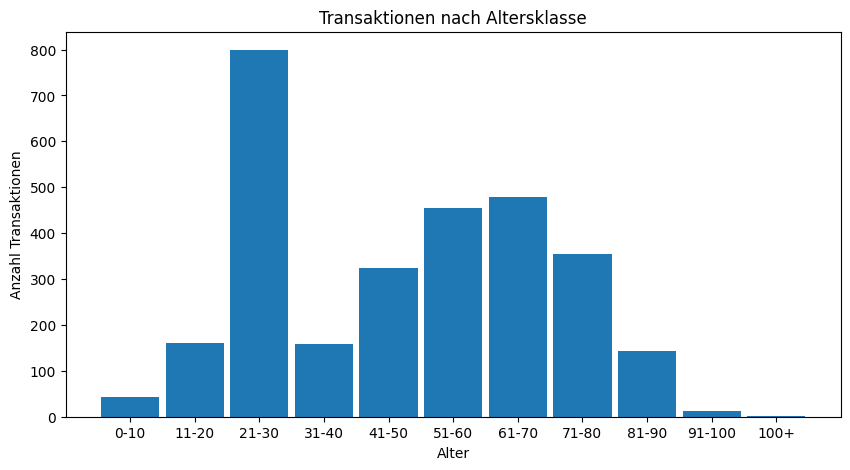

In [10]:
plt.figure(figsize=(10,5))
plt.title("Transaktionen nach Altersklasse")
plt.xlabel("Alter")
plt.ylabel("Anzahl Transaktionen")
plt.hist(merged_df["Alter"], bins=[0,10,20,30,40,50,60,70,80,90,100,110], rwidth=0.9)
plt.xticks([5,15,25,35,45,55,65,75,85,95,105],["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","100+"])
""

''

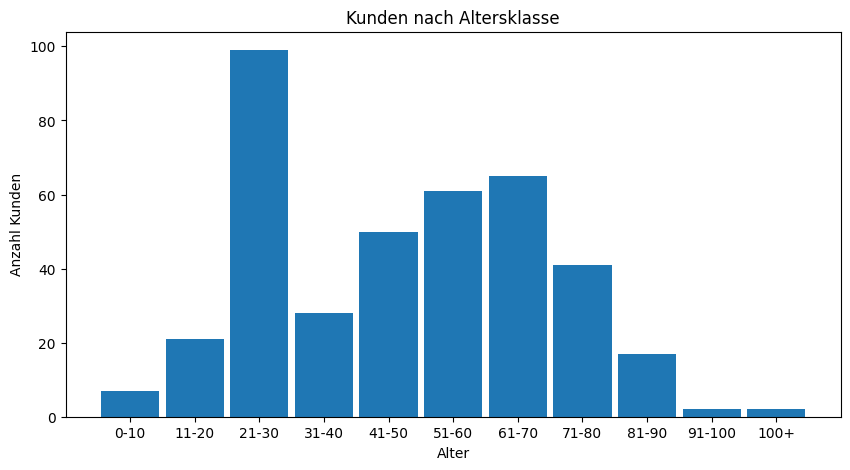

In [11]:
plt.figure(figsize=(10,5))
plt.title("Kunden nach Altersklasse")
plt.xlabel("Alter")
plt.ylabel("Anzahl Kunden")
plt.hist(kundendaten_cleaned["Alter"], bins=[0,10,20,30,40,50,60,70,80,90,100,110], rwidth=0.9)
plt.xticks([5,15,25,35,45,55,65,75,85,95,105],["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","100+"])
""

# Fragestellungen

## 1. In welchem Bezirk befindet sich die Buchhandlung?
Unter der Annahme, dass die meisten Kunden in der Nähe der Buchhandlung wohnen, können wir durch die Analyse der Kundenadressen den Bezirk der Buchhandlung herausfinden.

Die Analyse liegt nahe, dass die **Buchhandlung in Bezirk 4** liegt, da dies in über 60% der Transaktionen der Wohnort der Kunden ist. 

''

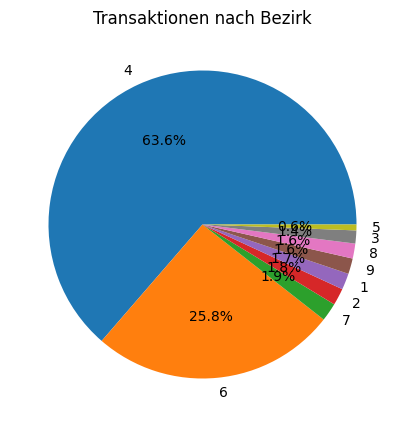

In [12]:
transaktionen_nach_bezirk = merged_df.groupby('Wohnort_Bezirk').size().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Transaktionen nach Bezirk")
plt.pie(transaktionen_nach_bezirk, labels=transaktionen_nach_bezirk.index, autopct='%1.1f%%')
""

## 2. In welchem Bezirk wohnt die Mehrzahl der Studenten?
Dazu betrachten wir nur die Kunden, die als Beruf "Student" angegeben haben.
Die Analyse zeigt, dass über 80% der Studenten im **Bezirk 6** wohnt.

''

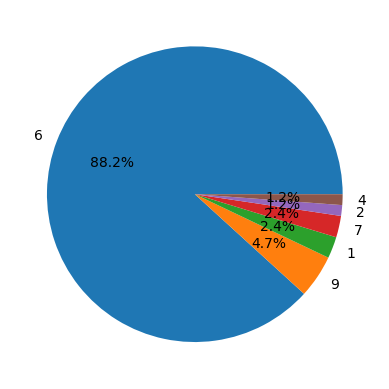

In [13]:
studenten = kundendaten_cleaned[kundendaten_cleaned["Beruf"] == "Student"]
studenten_nach_bezirk = studenten.groupby('Wohnort_Bezirk').size().sort_values(ascending=False)
plt.pie(studenten_nach_bezirk, labels=studenten_nach_bezirk.index, autopct='%1.1f%%')
""

## 3. Welche Fakultät befindet sich in der Außenstelle der Universität in deinem Viertel?
Dazu können wir die Berufe der Kunden in Bezirk 4 im Vergleich zu den Berufen aller anderen Kunden analysieren.

Da es gar keine Kunden aus Bezirk 4 gibt, die als Beruf "Student" angegeben haben, können wir keine Rückschlüsse auf die Fakultät ziehen.  
Es kann sogar angenommen werden, dass es **keine Außenstelle der Universität in Bezirk 4** gibt. (Fangfrage?)

''

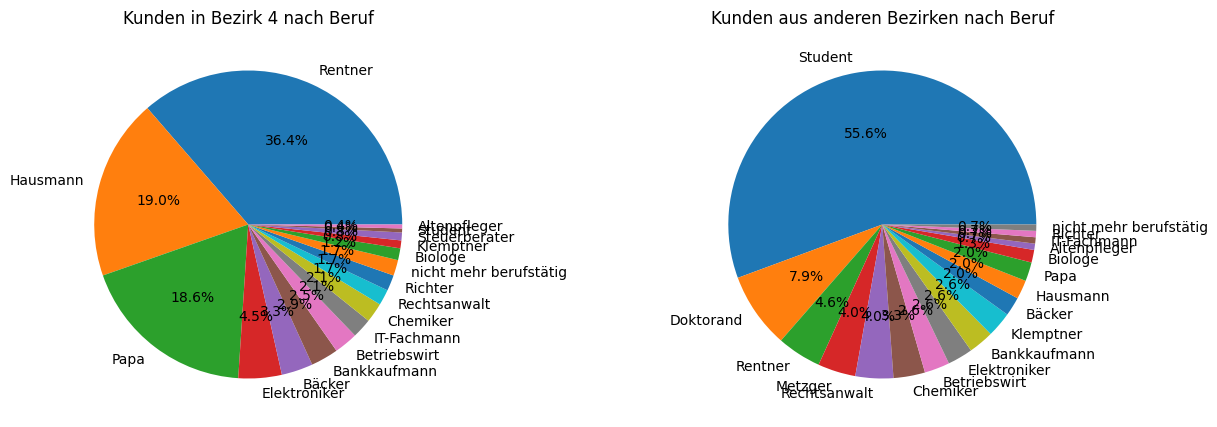

In [14]:
wohnt_in_meinem_bezirk = kundendaten_cleaned["Wohnort_Bezirk"] == 4
wohnende_nach_beruf = kundendaten_cleaned[wohnt_in_meinem_bezirk].groupby('Beruf').size().sort_values(ascending=False)
andere_nach_beruf = kundendaten_cleaned[~wohnt_in_meinem_bezirk].groupby('Beruf').size().sort_values(ascending=False)


fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title("Kunden in Bezirk 4 nach Beruf")
axs[0].pie(wohnende_nach_beruf, labels=wohnende_nach_beruf.index, autopct='%1.1f%%')
axs[1].set_title("Kunden aus anderen Bezirken nach Beruf")
axs[1].pie(andere_nach_beruf, labels=andere_nach_beruf.index, autopct='%1.1f%%')
""

## 4. Clustere die verkauften Bücher für die Analyse sinnvoll in Genres
Dazu können wir die Buchtitel analysieren und die Bücher in Genres clustern.

Für das Clustering wurde GPT4 verwendet

In [15]:
unique_titel = produktdaten_cleaned["Titel"].unique().tolist()
print(f"Anzahl einzigartiger Titel: {len(unique_titel)}")
unique_titel

Anzahl einzigartiger Titel: 174


['Das Sprach-Lese-Buch 1',
 'Das Sprach-Lese-Buch 2',
 'Das Sprach-Lese-Buch 3',
 'Das Sprach-Lese-Buch 4',
 '1000 spannende Fussballfakten',
 'ABC der Tiere 2. Sprachbuch',
 'ABC der Tiere 3. Sprachbuch',
 'ABC der Tiere 4. Sprachbuch',
 'ABC der Tiere. Die Silbenfibel',
 'ABC der Tiere. Grundstufe',
 'Achtsam Morden',
 'Affenhitze, Kommissar Kluftinger ermittelt',
 'Anwalts- und Steuerberaterhaftung',
 'Atlas der Reiselust Frankreich',
 'Basic Baking',
 'Basic Cooking',
 'Bildband Belgien',
 'Bildband Dänemark',
 'Bildband Italien',
 'Bildband Portugal',
 'Bildband Spanien',
 'Bildende Kunst Mittelstufe 10',
 'Bildende Kunst Mittelstufe 8',
 'Bildende Kunst Mittelstufe 9',
 'Biologie Mittelstufe 10',
 'Biologie Mittelstufe 8',
 'Biologie Mittelstufe 9',
 'Böser Wolf',
 'Chemie Mittelstufe 10',
 'Chemie Mittelstufe 8',
 'Chemie Mittelstufe 9',
 'Das Gesetz der Lagune: Commissario Brunettis zehnter Fall',
 'Das goldene Ei: Commissario Brunettis zweiundzwanzigster Fall',
 'Das große Ums

In [16]:
titel_clustering = {  
    "Kinderbuch": ['Das Minecraft Malbuch', 'Der beste Karlsson der Welt', 'Der Kinder Weltatlas', 'Die drei ??? Und das Gespensterschloss', 'Die drei ??? Und der Fluch des Rubins', 'Die drei ??? Und der seltsame Wecker', 'Die drei ??? Und der sprechende Papagei', 'Die drei ??? Und der tanzende Teufel', 'Fünf Freunde erforschen die Schatzinsel', 'Hanni und Nanni', 'Immer lustig in Bullerbü', 'Karlsson fliegt wieder', 'Karlsson vom Dach', 'Lustiges Bullerbü', 'Mehr von uns Kindern in Bullerbü', 'Pipi geht an Bord', 'Pipi in Taka-Tuka-Land', 'Pipi Langstrumpf', 'TKKG Junior: Detektive auf Tauchstation', 'TKKG Junior: Giftige Schokolade', 'TKKG Junior: Trügerischer Paddelspaß', 'Tobi Erstlesebuch', 'Weihnachten in Bullerbü', 'Wir Kinder aus Bullerbü'],  
    "Lehrbuch": ['Das Sprach-Lese-Buch 1', 'Das Sprach-Lese-Buch 2', 'Das Sprach-Lese-Buch 3', 'Das Sprach-Lese-Buch 4', 'ABC der Tiere 2. Sprachbuch', 'ABC der Tiere 3. Sprachbuch', 'ABC der Tiere 4. Sprachbuch', 'ABC der Tiere. Die Silbenfibel', 'ABC der Tiere. Grundstufe', 'Deutsch mit Olli 1 - Fibel -', 'Deutsch mit Olli 3 - Sprachbuch -', 'eins zwei drei. Mathematik 1', 'eins zwei drei. Mathematik 2', 'eins zwei drei. Mathematik 3', 'eins zwei drei. Mathematik 4', 'Elektrotechnik 1. Lehrjahr', 'Elektrotechnik 3. Lehrjahr', 'Englisch Mittelstufe 10', 'Englisch Mittelstufe 8', 'Englisch Mittelstufe 9', 'Französisch Mittelstufe 10', 'Französisch Mittelstufe 8', 'Französisch Mittelstufe 9', 'Geschichte Mittelstufe 10', 'Geschichte Mittelstufe 8', 'Geschichte Mittelstufe 9', 'Mathematik Mittelstufe 10', 'Mathematik Mittelstufe 8', 'Mathematik Mittelstufe 9', 'Mathematik Oberstufe', 'Religion Mittelstufe 10', 'Religion Mittelstufe 8', 'Religion Mittelstufe 9', 'Sozialkunde Oberstufe', 'Zahlenzauber 1', 'Zahlenzauber 2', 'Zahlenzauber 3', 'Zahlenzauber 4', 'Jo-Jo. Mathematik 1', 'Jo-Jo. Mathematik 2', 'Jo-Jo. Mathematik 3', 'Jo-Jo. Mathematik 4', 'Biologie Mittelstufe 10', 'Biologie Mittelstufe 8', 'Biologie Mittelstufe 9', 'Chemie Mittelstufe 10', 'Chemie Mittelstufe 8', 'Chemie Mittelstufe 9', 'Bildende Kunst Mittelstufe 10', 'Bildende Kunst Mittelstufe 8', 'Bildende Kunst Mittelstufe 9', 'PASSWORT LUPE Fibel Klasse 1', 'PASSWORT LUPE Fibel Klasse 2', 'PASSWORT LUPE Fibel Klasse 3', 'PASSWORT LUPE Fibel Klasse 4', 'Flex und Flora Lernpaket 1', 'Flex und Flora Lernpaket 2', 'Flex und Flora Lernpaket 3', 'Flex und Flora Lernpaket 4'],  
    "Kriminalroman": ['Milchgeld, Kommissar Kluftinger ermittelt','Milde Gaben: Commissario Brunettis einunddreißigster Fall','Achtsam Morden', 'Affenhitze, Kommissar Kluftinger ermittelt', 'Böser Wolf', 'Das Gesetz der Lagune: Commissario Brunettis zehnter Fall', 'Das goldene Ei: Commissario Brunettis zweiundzwanzigster Fall', 'Der Donnerstags Mord Club', 'Der Mann der lächelte', 'Der Sohn: Kriminalroman', 'Die falsche Fährte', 'Die fünfte Frau', 'Die Lebenden und die Toten', 'Die Morde von Corwie Castle', 'Die unbekannte Tote', 'DieBrandmauer', 'Erbarmen', 'Erlösung', 'Erntedank, Kommissar Kluftinger ermittelt', 'Fährte: Ein neuer Fall für Kommissar Harry Hole ? Der internationale Krimi-Bestseller aus Norwegen', 'Flüchtiges Begehren: Commissario Brunettis dreißigster Fall', 'Funkenmord, Kommissar Kluftinger ermittelt', 'Geheime Quellen: Commissario Brunettis neunundzwanzigster Fall', 'Grimmbart, Kommissar Kluftinger ermittelt', 'Haus der Mörder', 'Herzblut, Kommissar Kluftinger ermittelt', 'Himmelhorn, Kommissar Kluftinger ermittelt', 'Hunde von Riga', 'Kommissar Kluftinger ermittelt', 'Laienspiel, Kommissar Kluftinger ermittelt', 'Mittsommermord', 'Mord am Strandweg', 'Mord auf der großen Freiheit', 'Mord im Orientexpress', 'Mord im Watt', 'Mörder ohne Gesicht', 'Mörderische Kreuzfahrt', 'Mörderische Schären', 'Opfer 2117', 'Opferbucht', 'Rattentod', 'Rauhnacht, Kommissar Kluftinger ermittelt', 'Rotkehlchen: Ein Fall für Harry Hole (Ein Harry-Hole-Krimi, Band 3)', 'Schneewitchen muss sterben', 'Seegrund, Kommissar Kluftinger ermittelt', 'Sherlock Holmes Bd. 1: Eine Studie in Scharlachrot / Das Zeichen der Vier (Schmuckausgabe)', 'Sherlock Holmes Bd. 2: Die Abenteuer (Schmuckausgabe)', 'Sherlock Holmes Bd. 4: Der Hund der Baskervilles (Kleine Schmuckausgabe)', 'Strandgrab', 'Tiefe Wunden', 'Unter Haien', 'Venezianisches Finale: Commissario Brunettis erster Fall', 'Wie die Saat, so die Ernte: Commissario Brunettis zweiunddreißigster Fall'],  
    "Sachbuch": ['1000 spannende Fussballfakten', 'Anwalts- und Steuerberaterhaftung', 'Das große Umsatzsteuer-Handbuch', 'Das große WM-Buch 2022', 'Das Steuer-Handbuch', 'Der Steuerstreit', 'Die Fitness-Bibel', 'Die Organschaft im Steuerrecht mit Fallbeispielen', 'Die Selbstanzeige im Steuerstrafverfahren', 'EStG Kommentare', 'Erbrecht für die steuerberatenden Beruf', 'Erbschafts- und Schenkungssteuer', 'Fiskalstrafrecht', 'Grundlagen des schweizer Steuerrechts', 'Grundlagen des US-amerikanischen Steuerrechts', 'Grundriss des deutschen Steuerrechts', 'Haftung für Steuerschulden', 'Sport und Ernährung', 'Was Ist Was - Das alte Agypten', 'Was Ist Was - Planeten', 'Was Ist Was - Versunkene Schätze', 'Yoga'],  
    "Reisebuch": ['Atlas der Reiselust Frankreich', 'Bildband Belgien', 'Bildband Dänemark', 'Bildband Italien', 'Bildband Portugal', 'Bildband Spanien', 'Legendäre Urlaubsorte in Italien', 'Lindau - Bildband & Inselführer', 'Lonely Planet Bildband Legendäre Radtouren in Deutschland', 'Lonely Planet Bildband Legendäre Radtouren in Europa'],  
    "Kochbuch": ['Familienrezepte', 'Jamie kocht Italien', 'Kreative Weihnachtsrezepte','Basic Baking', 'Basic Cooking','One Pot Gerichte']  
}

In [17]:
produktdaten_extended = produktdaten_cleaned.copy()
produktdaten_extended["Genre"] = None

for i, row in produktdaten_extended.iterrows():
    for category, titles in titel_clustering.items():
        if row["Titel"] in titles:
            produktdaten_extended.loc[i,"Genre"] = category
            continue
produktdaten_extended.head()

,Buch_ID,Titel,Autor,Preis,Buch_typ,Genre
0,205,Das Sprach-Lese-Buch 1,Klaus Diedrichs,25.0,hard cover,Lehrbuch
1,206,Das Sprach-Lese-Buch 2,Klaus Diedrichs,24.0,hard cover,Lehrbuch
2,207,Das Sprach-Lese-Buch 3,Klaus Diedrichs,22.0,hard cover,Lehrbuch
3,208,Das Sprach-Lese-Buch 4,Klaus Diedrichs,24.0,hard cover,Lehrbuch
4,132,1000 spannende Fussballfakten,Daniel Kicker,22.0,hard cover,Sachbuch


''

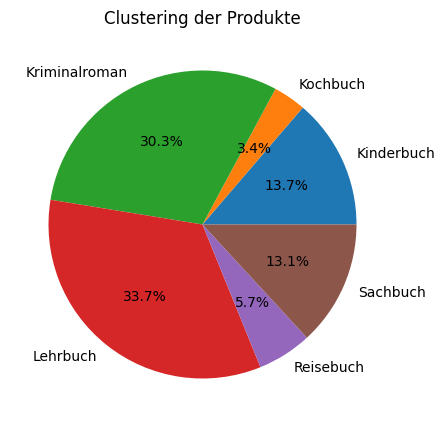

In [18]:
plt.figure(figsize=(10,5))
plt.title("Clustering der Produkte")
plt.pie(produktdaten_extended.groupby("Genre").size(), labels=produktdaten_extended.groupby("Genre").size().index, autopct='%1.1f%%')
""

## Aufgabe 5: Clustere die Berufe sinnvoll in Berufsgruppen
Hierzu werden die vorverarbeiteten Daten in drei Kategorien unterteilt: Kind, Angestellt, Arbeitslos, Rentner

In [19]:
unique_berufe = kundendaten_cleaned["Beruf"].unique().tolist()
print(f"Anzahl einzigartiger Titel: {len(unique_berufe)}")
unique_berufe

Anzahl einzigartiger Titel: 19


['Student',
 'Doktorand',
 'Rentner',
 'nicht mehr berufstätig',
 'Hausmann',
 'Papa',
 'Chemiker',
 'Betriebswirt',
 'IT-Fachmann',
 'Elektroniker',
 'Rechtsanwalt',
 'Steuerberater',
 'Klemptner',
 'Bankkaufmann',
 'Bäcker',
 'Richter',
 'Biologe',
 'Altenpfleger',
 'Metzger']

In [20]:
beruf_clustering = {
    "Kind": ["Schüler","Student","Doktorand"],
    "Angestellt" : ["Chemiker","Betriebswirt","IT-Fachmann","Elektroniker","Rechtsanwalt","Steuerberater","Klemptner","Bankkaufmann","Biologe","Bäcker","Richter","Altenpfleger","Metzger"],
    "Arbeitslos" : ["nicht mehr berufstätig","Hausmann","Papa"],
    "Rentner" : ["Rentner"]
}

In [21]:
kundendaten_extended = kundendaten_cleaned.copy()
kundendaten_extended["Berufsgruppe"] = None

for i, row in kundendaten_extended.iterrows():
    for category, professions in beruf_clustering.items():
        if row["Beruf"] in professions:
            kundendaten_extended.loc[i,"Berufsgruppe"] = category
            continue
kundendaten_extended.head()

,Kunde_Nr,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter,Berufsgruppe
0,23200,Thomas Huber,6,Student,m,evangelisch,25,Kind
1,23201,Michaela Schmidt,1,Student,w,evangelisch,26,Kind
2,23202,Lena Ebert,6,Student,w,katholisch,23,Kind
3,23203,Kurt Funkel,6,Student,m,katholisch,21,Kind
4,23204,Eva Jäger,7,Student,w,konfessionslos,22,Kind


''

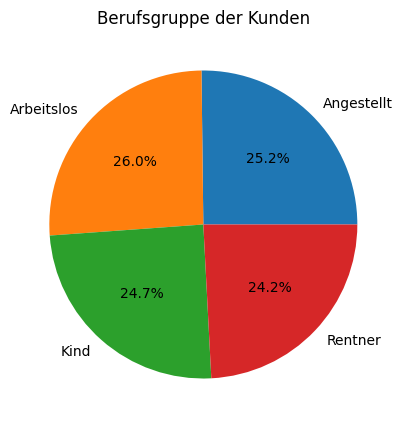

In [22]:
plt.figure(figsize=(10,5))
plt.title("Berufsgruppe der Kunden")
plt.pie(kundendaten_extended.groupby("Berufsgruppe").size(), labels=kundendaten_extended.groupby("Berufsgruppe").size().index, autopct='%1.1f%%')
""

## Aufgabe 6: Erstelle Kundenprofile
Welche sind die drei wichtigsten Kundenprofile für den 
Bücherabsatz in deinem Ladengeschäft? Charakterisiere die Kundenprofile.

## Aufgabe 7: Erstelle eine Umsatzanalyse für 2023 auf Monatsbasis
Was sind die Schwerpunktmonate?

Nach Aufdröselung der Transaktionen nach Monaten, wird der Umsatz pro Monat berechnet und visualisiert.
Dies zeigt, dass die Monate 4,9,10 und 12 die umsatzstärksten sind.

In [36]:
extended_df = merged_df.copy()
extended_df['Kauf_Monat'] = pd.to_datetime(extended_df['Kauf_Datum']).dt.to_period('M')
extended_df["Kauf_Woche"] = pd.to_datetime(extended_df['Kauf_Datum']).dt.to_period('W')

grouped_monat = extended_df.groupby("Kauf_Monat").aggregate({"Preis":"sum"})
grouped_monat

,Preis
Kauf_Monat,
2023-01,2067.0
2023-02,1989.0
2023-03,1922.0
2023-04,12358.0
2023-05,1919.0
2023-06,1946.0
2023-07,1949.0
2023-08,2020.0
2023-09,13862.0


<BarContainer object of 12 artists>

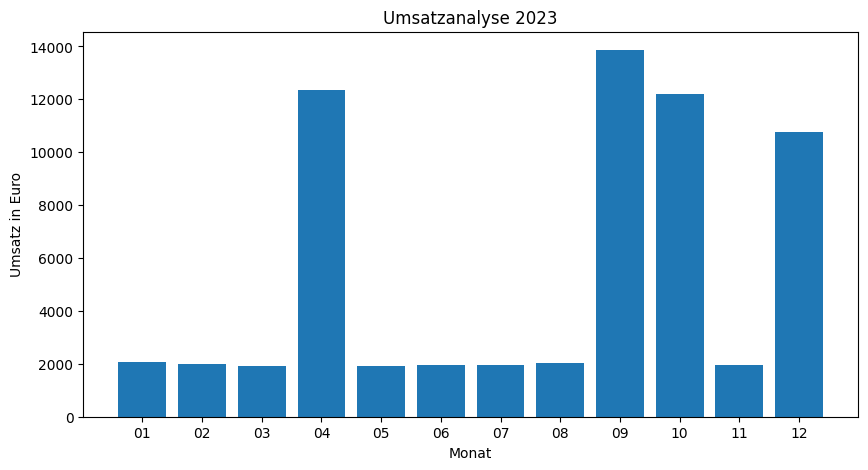

In [34]:
plt.figure(figsize=(10,5))
plt.title("Umsatzanalyse 2023")
plt.xlabel("Monat")
plt.ylabel("Umsatz in Euro")
plt.bar(grouped.index.astype(str).str.replace("2023-",""), grouped["Preis"])